In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

print("Libraries imported Successfully!")

Libraries imported Successfully!


In [ ]:
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Display the first 5 rows to see what the data looks like
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
# Check the dimensions of the DataFrame (rows, columns)
print("Data Shape:",df.shape)
print("-"*30)

# Check for missing values in each column
print("Missing Values:")
print(df.isnull().sum())
print("-"*30)

# Get information about the DataFrame, including data types and memory usage
print("Data Information:")
print(df.info())

Data Shape: (1470, 35)
------------------------------
Missing Values:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0


In [ ]:
df_processd = df.copy()

In [ ]:
# Map the ordinal features to their string representations
education_map = {1:'Below College' , 2:'College' , 3:'Bachelor' , 4:'Master' , 5:'Doctor'}
satisfaction_map = {1:'Low' , 2:'Mid' , 3:'High' , 4:'Very High'}
performance_map = {1:'Low' , 2:'Good' , 3:'Excelent' , 4:'Outstanding'}
worklife_map = {1:'Bad' , 2:'Good' , 3:'Better' , 4:'Best'}

df_processd['Education'] = df_processd['Education'].map(education_map)
df_processd['EnvironmentSatisfaction'] = df_processd['EnvironmentSatisfaction'].map(satisfaction_map)
df_processd['JobInvolvement'] = df_processd['JobInvolvement'].map(satisfaction_map)
df_processd['JobSatisfaction'] = df_processd['JobSatisfaction'].map(satisfaction_map)
df_processd['PerformanceRating'] = df_processd['PerformanceRating'].map(performance_map)
df_processd['RelationshipSatisfaction'] = df_processd['RelationshipSatisfaction'].map(satisfaction_map)
df_processd['PerformanceRating'] = df_processd['PerformanceRating'].map(performance_map)
df_processd['WorkLifeBalance'] = df_processd['WorkLifeBalance'].map(worklife_map)

#Checking the first few rows
print("Data after mapping ordinal features:")
df_processd[['Education' , 'JobSatisfaction' , 'WorkLifeBalance' ]].head()

Data after mapping ordinal features:


,Education,JobSatisfaction,WorkLifeBalance
0,College,Very High,Bad
1,Below College,Mid,Better
2,College,High,Better
3,Master,High,Better
4,Below College,Mid,Better


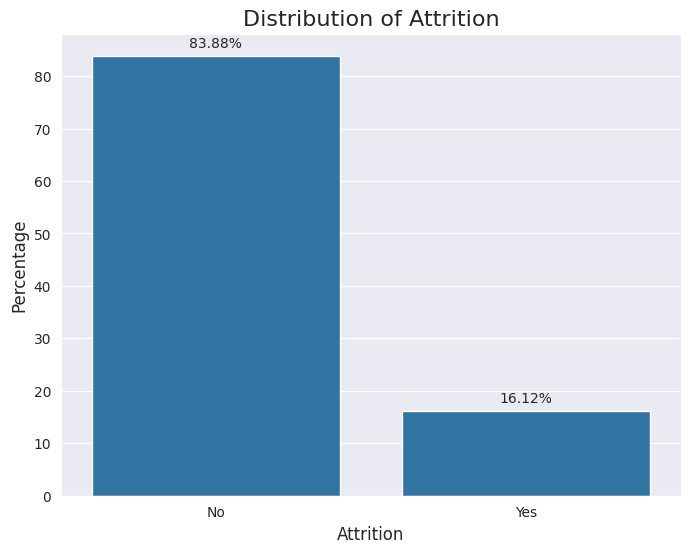

In [ ]:
# Set the plot style
sns.set_style('darkgrid')

# Calculate attrition rate
attrition_rate = df_processd['Attrition'].value_counts(normalize = True) *100

# Plot the distribution of Attrition
plt.figure(figsize=(8,6))
ax = sns.barplot(x=attrition_rate.index , y=attrition_rate.values)

for p in ax.patches:
  ax.annotate(f'{p.get_height():.2f}%',
              (p.get_x() + p.get_width() / 2. , p.get_height()),
              ha='center' , va='center',
              xytext = (0,9),
              textcoords = 'offset points')

plt.title('Distribution of Attrition',fontsize = 16)
plt.xlabel('Attrition',fontsize = 12)
plt.ylabel('Percentage',fontsize = 12)
plt.show()

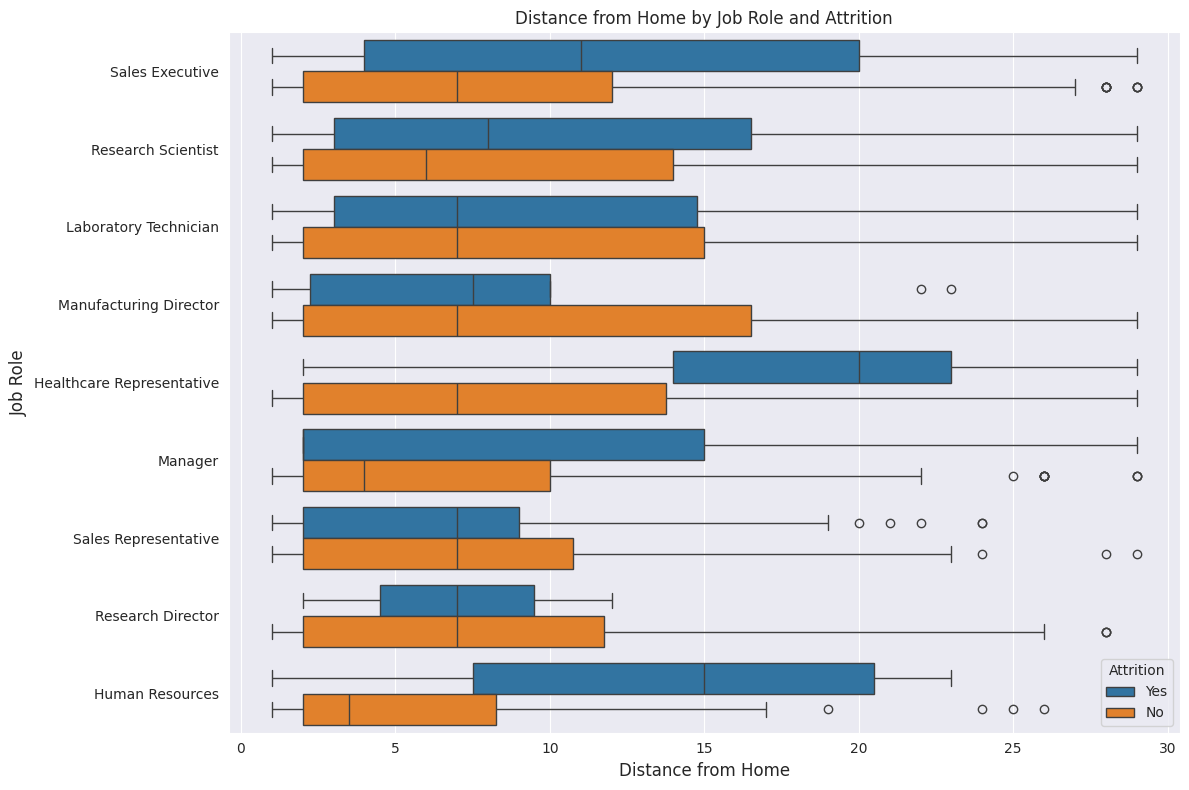

In [ ]:
#breakdown of distance from home by job role and attrition
plt.figure(figsize=(12,8))
sns.boxplot(data=df_processd , y='JobRole' , x='DistanceFromHome' , hue='Attrition', orient='h')
plt.title('Distance from Home by Job Role and Attrition')
plt.xlabel('Distance from Home', fontsize=12)
plt.ylabel('Job Role' , fontsize=12)
plt.legend(title = 'Attrition')
plt.tight_layout()
plt.show()

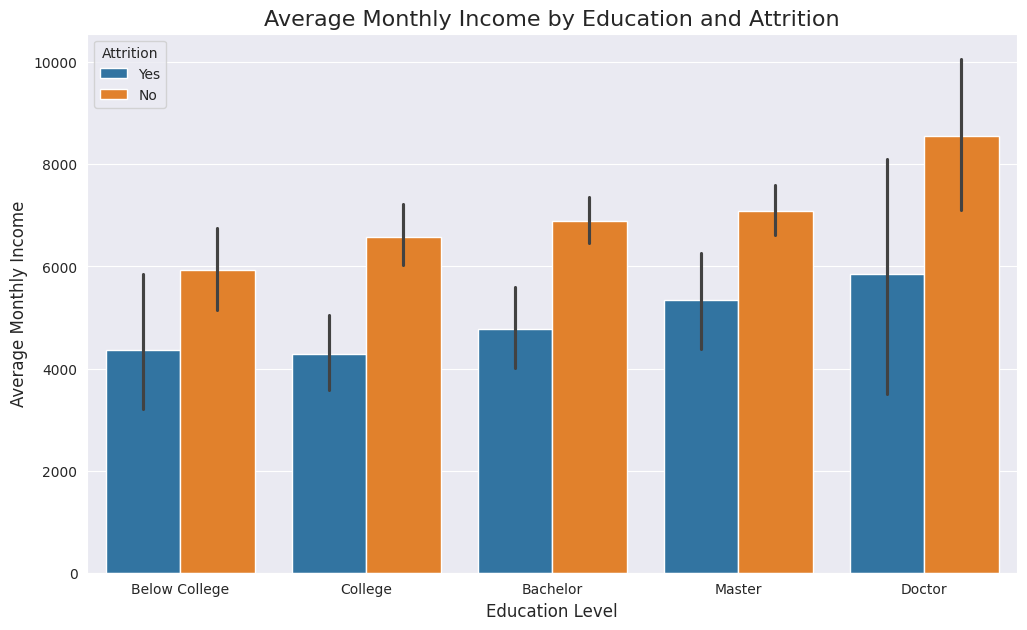

In [ ]:
#Compare average monthly income by education and attrition
plt.figure(figsize=(12, 7))
sns.barplot(data=df_processd, x='Education', y='MonthlyIncome', hue='Attrition',
            order=['Below College', 'College', 'Bachelor', 'Master', 'Doctor'])
plt.title('Average Monthly Income by Education and Attrition', fontsize=16)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Average Monthly Income', fontsize=12)
plt.legend(title='Attrition')
plt.show()

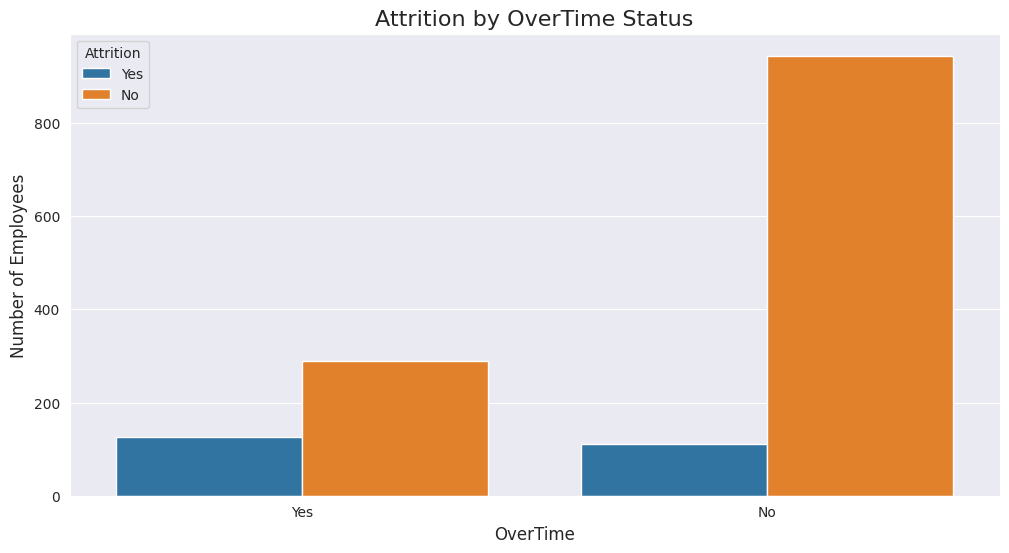

In [ ]:
#Does working overtime lead to more people quitting?
plt.figure(figsize=(12,6))
sns.countplot(data=df_processd , x='OverTime' , hue='Attrition')
plt.title('Attrition by OverTime Status',fontsize=16)
plt.xlabel('OverTime' , fontsize=12)
plt.ylabel('Number of Employees' , fontsize=12)
plt.show()

In [ ]:
# Drop columns that are unique to each employee or have only one value
df_model = df.drop(['EmployeeCount' , 'EmployeeNumber' , 'StandardHours' , 'Over18'], axis=1)

# Convert the target variable 'Attrition' to 0s and 1s
df_model['Attrition'] = df_model['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

# Convert all other categorical columns to numerical using one-hot encoding
df_model = pd.get_dummies(df_model , drop_first=True)

print("Shape of the data ready for modeling:" , df_model.shape)
df_model.head()

Shape of the data ready for modeling: (1470, 45)


,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,2,94,3,2,4,...,False,False,False,False,False,True,False,False,True,True
1,49,0,279,8,1,3,61,2,2,2,...,False,False,False,False,True,False,False,True,False,False
2,37,1,1373,2,2,4,92,2,1,3,...,True,False,False,False,False,False,False,False,True,True
3,33,0,1392,3,4,4,56,3,1,3,...,False,False,False,False,True,False,False,True,False,True
4,27,0,591,2,1,1,40,3,1,2,...,True,False,False,False,False,False,False,True,False,False


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score

x = df_model.drop('Attrition', axis=1)
y = df_model['Attrition']

X_train , X_test , y_train , y_test = train_test_split(x , y , test_size=0.25 , random_state = 42 , stratify = y)

model = RandomForestClassifier(n_estimators=100 , random_state=42 , class_weight="balanced" )
model.fit(X_train , y_train)

print("Model trained successfully!")

Model trained successfully!


Model Accuracy: 84.51%
--------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

  No (Stays)       0.85      0.99      0.91       309
Yes (Leaves)       0.60      0.10      0.17        59

    accuracy                           0.85       368
   macro avg       0.73      0.54      0.54       368
weighted avg       0.81      0.85      0.80       368

--------------------------------------------------
Confusion Matrix:


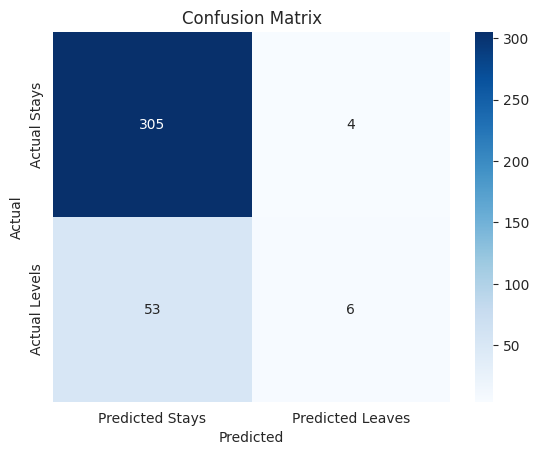

In [ ]:
# Evaluate the Model

# Make predictions on the test data
y_pred = model.predict(X_test)

# Print the Accuracy
print(f"Model Accuracy: {accuracy_score(y_test , y_pred) * 100:.2f}%")
print("-" * 50)

# Print the classification report (Precision, Recall, F1-Score)
print("Classification Report:")
print(classification_report(y_test , y_pred , target_names=['No (Stays)' , 'Yes (Leaves)']))
print("-" * 50)

# Display the Confusion Matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test , y_pred)
sns.heatmap(cm , annot=True , fmt='d' , cmap='Blues' , xticklabels=['Predicted Stays' ,'Predicted Leaves'] , yticklabels=['Actual Stays' , 'Actual Levels'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

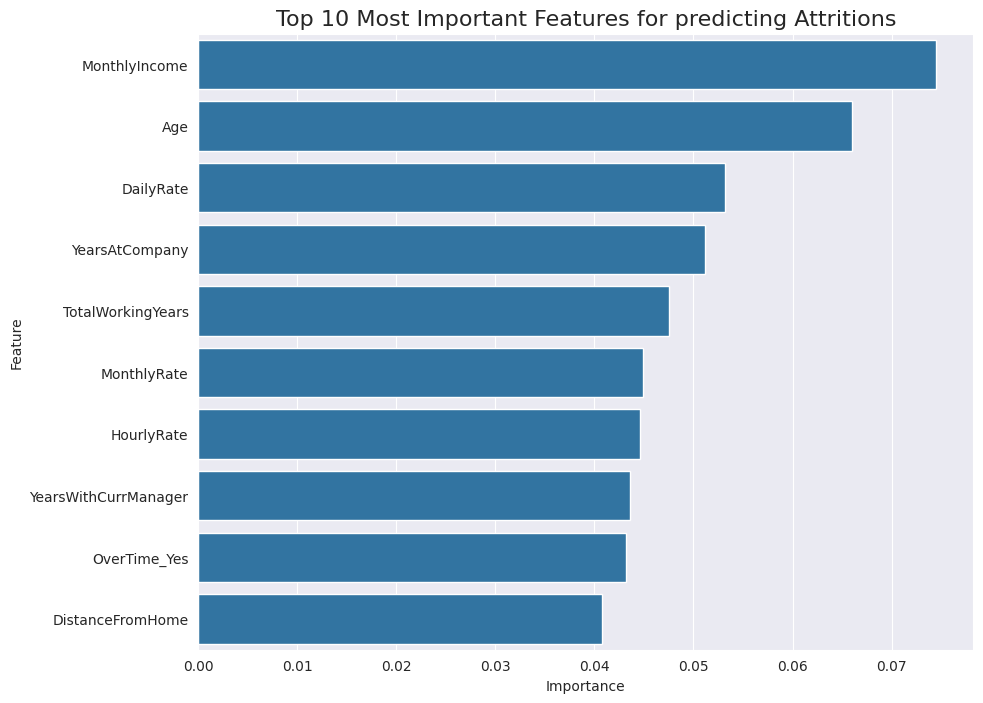

In [ ]:
# Get feature importances
importances = model.feature_importances_
feature_names = x.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'feature': feature_names , 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance' , ascending=False).head(10)

# Plot the top 10 most important features
plt.figure(figsize=(10,8))
sns.barplot(x='importance' , y='feature' , data=feature_importance_df)
plt.title('Top 10 Most Important Features for predicting Attritions',fontsize=16)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
df_processd.to_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv', index=False)